<a href="https://colab.research.google.com/github/ranzan97/Exploratory-Data-Analysis/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Get basic information about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# Get summary statistics for numerical columns
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for missing values
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


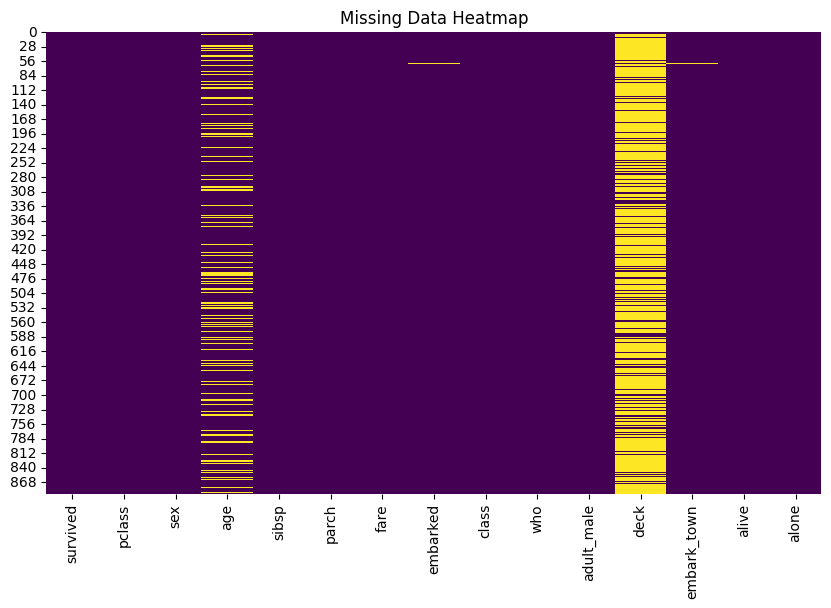

In [7]:
# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Handling Missing Values

In [9]:
# 1. Fill missing 'age' values using KNN Imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
titanic['age'] = imputer.fit_transform(titanic[['age']])

In [11]:
# 2. Add 'Unknown' as a new category to the 'deck' column
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
#  Fill missing 'deck' values with 'Unknown'
titanic['deck'].fillna('Unknown', inplace=True)

<ipython-input-11-c89170cb321d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['deck'].fillna('Unknown', inplace=True)


In [12]:
# 3. Fill missing 'embarked' values with the mode
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

<ipython-input-12-b28f4ed56175>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [13]:
# 4. Fill missing 'embark_town' values with the mode
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

<ipython-input-13-f9e38838806a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


In [14]:
# Verify that there are no more missing values
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


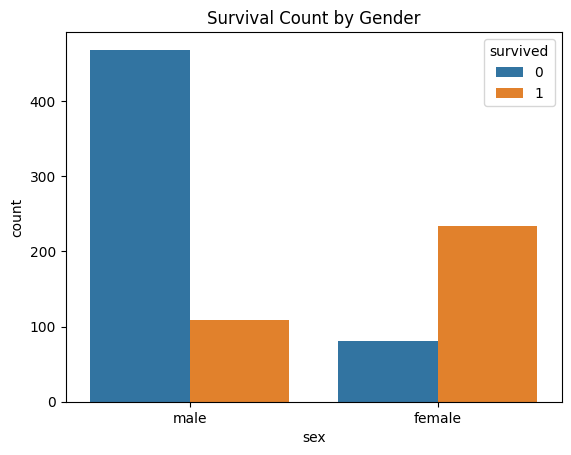

In [15]:
# Survival rate by gender
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Count by Gender')
plt.show()

In [16]:
# Calculate survival rate by gender
survival_by_gender = titanic.groupby('sex')['survived'].mean()
print(survival_by_gender)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


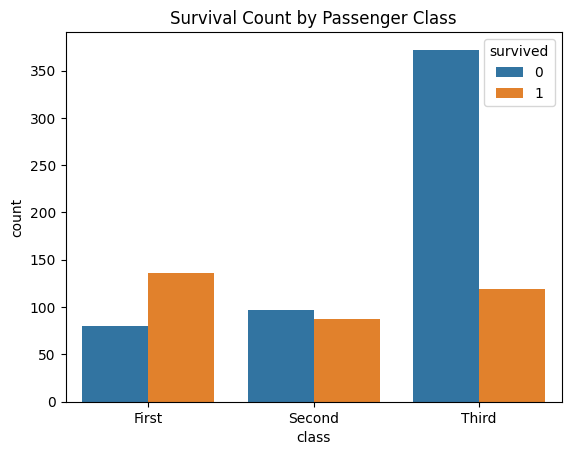

In [17]:
# Survival rate by passenger class
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Survival Count by Passenger Class')
plt.show()

In [18]:
# Calculate survival rate by class
survival_by_class = titanic.groupby('class')['survived'].mean()
print(survival_by_class)

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


<ipython-input-18-9608a9056baf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = titanic.groupby('class')['survived'].mean()


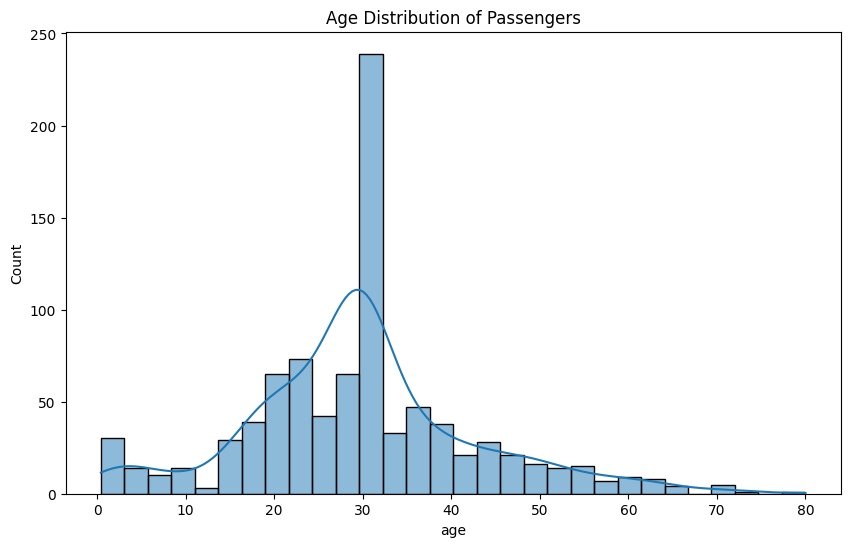

In [19]:
# Plot age distribution of passengers
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

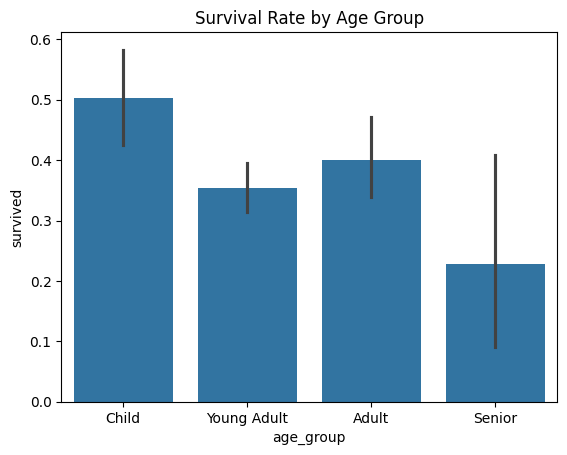

In [20]:
# Create age groups and plot survival rate by age group
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='age_group', y='survived', data=titanic)
plt.title('Survival Rate by Age Group')
plt.show()

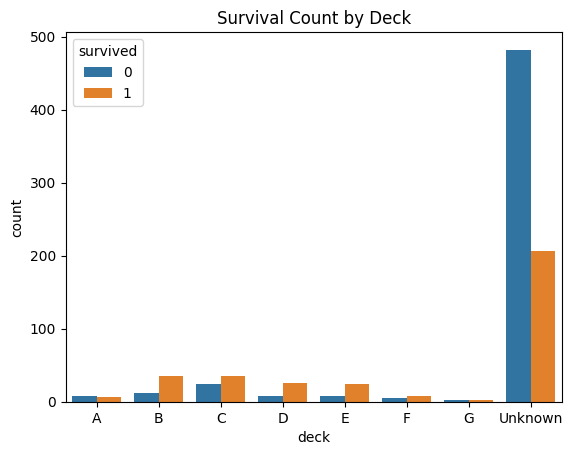

In [21]:
# Survival rate by deck
sns.countplot(x='deck', hue='survived', data=titanic)
plt.title('Survival Count by Deck')
plt.show()

In [22]:
# Calculate survival rate by deck
survival_by_deck = titanic.groupby('deck')['survived'].mean()
print(survival_by_deck)

deck
A          0.466667
B          0.744681
C          0.593220
D          0.757576
E          0.750000
F          0.615385
G          0.500000
Unknown    0.299419
Name: survived, dtype: float64


<ipython-input-22-3e9cc0294f0b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_deck = titanic.groupby('deck')['survived'].mean()


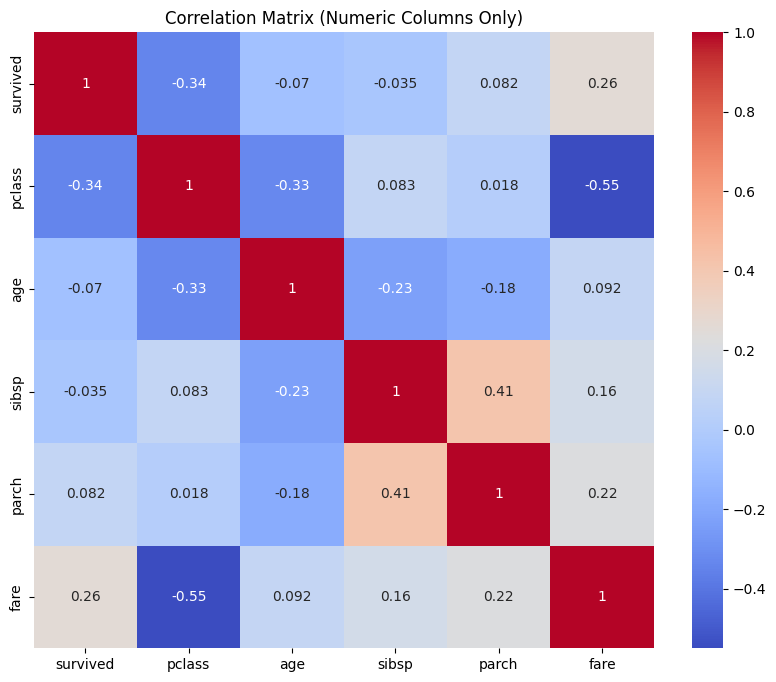

In [24]:
# Correlation matrix for numeric columns only
correlation_matrix = titanic.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

In [25]:
# Create a family size feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

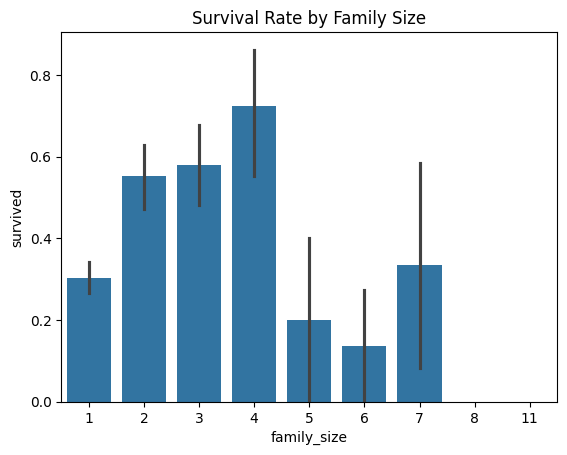

In [26]:
# Plot survival rate by family size
sns.barplot(x='family_size', y='survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.show()

In [27]:
# Save the cleaned dataset to a CSV file
titanic.to_csv('cleaned_titanic.csv', index=False)